# Perkenalan

'''

---
Horror Movies EDA by Dwita Alya

Program ini dibuat untuk menganalisa data film horror dari tahun 2010-2022, mencari tahu potensi profit dari film horror berdasarkan data yang sudah didapatkan. Selain itu juga program ini ditujukan untuk mencari informasi mengenai hubungan antara popularitas film horror dengan revenue yang didapatkan.

URL Dashboard Tableau: https://public.tableau.com/views/horror_movies_dashboard/HorrorMovieDashboard?:language=en-US&:display_count=n&:origin=viz_share_link

---

'''

# Identifikasi Masalah

Background: Sebuah PH Film berencana untuk membuat film horror yang akan rilis bersamaan dengan perayaan Halloween 2024.

Problem Statement: Mengetahui potensi profit film horor berdasarkan trend film horor dalam kurun waktu 2010-2022.

Penjabaran Masalah: 

1. Bagaimana trend film horor berdasarkan popularitas di tahun 2010-2022?
2. Film horor apa saja yang berada di Top 5 teratas berdasarkan popularitas?
3. Film horor apa saja yang berada di Top 5 teratas berdasarkan revenue?
4. Apakah revenue perfilm-an horor yang berbahasa Indonesia meningkat tiap tahunnya dari tahun 2010 sampai tahun 2022?
5. Apakah revenue perfilm-an horor untuk seluruh data meningkat tiap tahunnya dari tahun 2010 sampai tahun 2022?
6. Berapa besar rata-rata profit dan revenue film horor yang berbahasa Indonesia?
7. Berapa besar rata-rata profit dan revenue film horor yang berbahasa English?
8. Bagaimana potensi profit maksimum dan minimum dari film horor?
9. Bagaimana hubungan antara popularitas dan revenue dari data film horor tersebut?


# Data Loading

Sumber data film horror diambil dari link berikut: https://www.kaggle.com/datasets/sujaykapadnis/horror-movies-dataset

In [1]:
# import package
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data horror_movies.csv 
df = pd.read_csv('horror_movies.csv')
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,adult,backdrop_path,genre_names,collection,collection_name
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,False,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",760193.0,Orphan Collection
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,False,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",NaN,NaN
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,False,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",NaN,NaN
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,False,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",NaN,NaN
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,False,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,NaN,NaN


In [3]:
# eksplor informasi dari datasetnya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32540 entries, 0 to 32539
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 32540 non-null  int64  
 1   original_title     32540 non-null  object 
 2   title              32540 non-null  object 
 3   original_language  32540 non-null  object 
 4   overview           31254 non-null  object 
 5   tagline            12707 non-null  object 
 6   release_date       32540 non-null  object 
 7   poster_path        28066 non-null  object 
 8   popularity         32540 non-null  float64
 9   vote_count         32540 non-null  int64  
 10  vote_average       32540 non-null  float64
 11  budget             32540 non-null  int64  
 12  revenue            32540 non-null  int64  
 13  runtime            32540 non-null  int64  
 14  status             32540 non-null  object 
 15  adult              32540 non-null  bool   
 16  backdrop_path      135

In [4]:
df.describe()

,id,popularity,vote_count,vote_average,budget,revenue,runtime,collection
count,3.254000e+04,32540.000000,32540.000000,32540.000000,3.254000e+04,3.254000e+04,32540.000000,2.306000e+03
mean,4.459108e+05,4.013456,62.691487,3.335728,5.431266e+05,1.349747e+06,62.142901,4.815349e+05
std,3.057447e+05,37.513472,420.887474,2.876002,4.542668e+06,1.443048e+07,40.998527,3.244982e+05
min,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.560000e+02
25%,1.464948e+05,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,14.000000,1.554210e+05
50%,4.265210e+05,0.840000,2.000000,4.000000,0.000000e+00,0.000000e+00,80.000000,4.712590e+05
75%,7.075340e+05,2.243250,11.000000,5.700000,0.000000e+00,0.000000e+00,91.000000,7.590672e+05
max,1.033095e+06,5088.584000,16900.000000,10.000000,2.000000e+08,7.018426e+08,683.000000,1.033032e+06


# Data Cleaning

Pada bagian ini akan dilakukan cleaning data dan normalisasi data

In [5]:
# menghapus kolom adult, collection, dan collection_name karena tidak akan digunakan pada analisis
df = df.drop(['adult', 'collection', 'collection_name'], axis=1)

In [6]:
# mengubah kolom release_date menjadi data type datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 32540 entries, 0 to 32539
Series name: release_date
Non-Null Count  Dtype         
--------------  -----         
32540 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 254.3 KB


In [9]:
# ekstrak tahun dari kolom release_date ke kolom baru release_year
df['year'] = df['release_date'].dt.year
df.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,backdrop_path,genre_names,year
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,"Horror, Thriller",2022
1,760741,Beast,Beast,en,A recently widowed man and his two teenage dau...,Fight for family.,2022-08-11,/xIGr7UHsKf0URWmyyd5qFMAq4d8.jpg,2172.338,584,7.1,0,56000000,93,Released,/2k9tBql5GYH328Krj66tDT9LtFZ.jpg,"Adventure, Drama, Horror",2022
2,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,"Horror, Mystery, Thriller",2022
3,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,"Horror, Thriller",2022
4,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,2022


In [17]:
# normalisasi kolom genre_names
df2 = df.assign(genre_names=df.genre_names.str.split(',')).explode('genre_names').reset_index(drop=True)

# filter yang genre horror-nya saja
df2 = df2[
    (df2['genre_names'] == 'Horror')
]
df2.head()

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,backdrop_path,genre_names,year
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,Horror,2022
5,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,Horror,2022
8,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,Horror,2022
10,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,2022
11,1014226,Sonríe,Sonríe,es,NaN,NaN,2022-08-18,/wHowKf77gNZbVo9yu5ggiNBFCdJ.jpg,939.712,1,1.0,0,0,0,Released,NaN,Horror,2022


In [18]:
# membuat kolom profit
df2['profit'] = df2['revenue'] - df2['budget']

In [19]:
# filter data untuk menampilkan data dari tahun 2010-2022 saja
df2 = df2[
    (df2['year'] >= 2010) &
    (df2['year'] <= 2022) 
]
df2

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,backdrop_path,genre_names,year,profit
0,760161,Orphan: First Kill,Orphan: First Kill,en,After escaping from an Estonian psychiatric fa...,There's always been something wrong with Esther.,2022-07-27,/pHkKbIRoCe7zIFvqan9LFSaQAde.jpg,5088.584,902,6.9,0,9572765,99,Released,/5GA3vV1aWWHTSDO5eno8V5zDo8r.jpg,Horror,2022,9572765
5,882598,Smile,Smile,en,"After witnessing a bizarre, traumatic incident...","Once you see it, it’s too late.",2022-09-23,/hiaeZKzwsk4y4atFhmncO5KRxeT.jpg,1863.628,114,6.8,17000000,45000000,115,Released,/mVNPfpydornVe4H4UCIk7WevWjf.jpg,Horror,2022,28000000
8,756999,The Black Phone,The Black Phone,en,"Finney Blake, a shy but clever 13-year-old boy...",Never talk to strangers.,2022-06-22,/lr11mCT85T1JanlgjMuhs9nMht4.jpg,1071.398,2736,7.9,18800000,161000000,103,Released,/AfvIjhDu9p64jKcmohS4hsPG95Q.jpg,Horror,2022,142200000
10,772450,Presencias,Presences,es,A man who loses his wife and goes to seclude h...,NaN,2022-09-07,/dgDT3uol3mdvwEg0jt1ble3l9hw.jpg,1020.995,83,7.0,0,0,0,Released,/ojfzhdwRemcDt1I6pao6vVLw9AA.jpg,Horror,2022,0
11,1014226,Sonríe,Sonríe,es,NaN,NaN,2022-08-18,/wHowKf77gNZbVo9yu5ggiNBFCdJ.jpg,939.712,1,1.0,0,0,0,Released,NaN,Horror,2022,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64757,1031198,Horror Nights,Horror Nights,en,From the writers and producers of the horror a...,NaN,2020-03-15,/tOq09MDGOhI91llQaEkHC6IG6I4.jpg,0.600,0,0.0,0,0,89,Released,NaN,Horror,2020,0
64780,1031989,The Mutilator Watchalong Live,The Mutilator Watchalong Live,en,Something is afoot at ARROW HQ. A mysterious p...,NaN,2021-10-31,/vfMjGTLLTlcvDuD00S2DIKc065L.jpg,0.600,0,0.0,0,0,90,Released,NaN,Horror,2021,0
64784,1032185,Nuevo Mensaje,New Message,es,A young boy comes back home from an agitated n...,You´ve got a new message,2019-09-02,/v5BMkxyxvRYDVmUV2Tyv2jcwpcY.jpg,0.600,0,0.0,0,0,6,Released,NaN,Horror,2019,0
64785,1032201,Catch a Butcher,Catch a Butcher,en,In a maternity ward in nineteenth-century Indi...,NaN,2021-11-20,/4LHrYpe6bjiT8Wvkzl3269LIUZl.jpg,0.600,0,0.0,0,0,11,Released,NaN,Horror,2021,0


In [21]:
# membersihkan data yang memiliki nilai missing value
df2 = df2.dropna()

In [49]:
# save data hasil cleaning ke csv baru
df2.to_csv('cleaned_horror_movies.csv')

# Analisa dan Perhitungan Data

1. Mencari tahu trend film horor berdasarkan popularitas dalam rentang tahun 2010-2022

<Axes: xlabel='year', ylabel='popularity'>

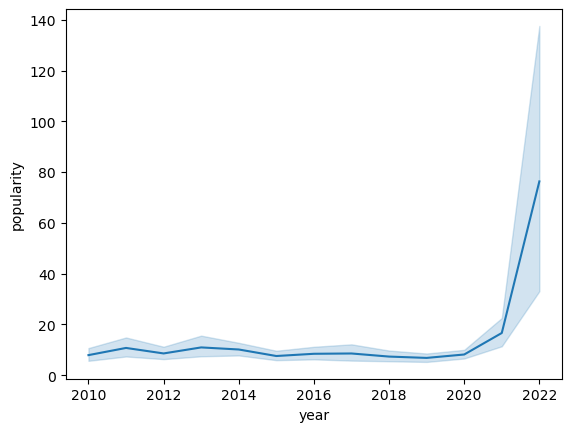

In [64]:
# visualisasi data berdasarkan total popularitas tahun 2010-2022
sns.lineplot(data=df2, x='year',y='popularity')

Insight: dari visualisasi data didapatkan informasi bahwa trend film horor berdasarkan popularitas mengalami kecenderungan untuk naik, dengan puncaknya pada tahun 2022.

2. Mencari tahu film horor mana saja yang berada di TOP 5 teratas berdasarkan popularitas?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


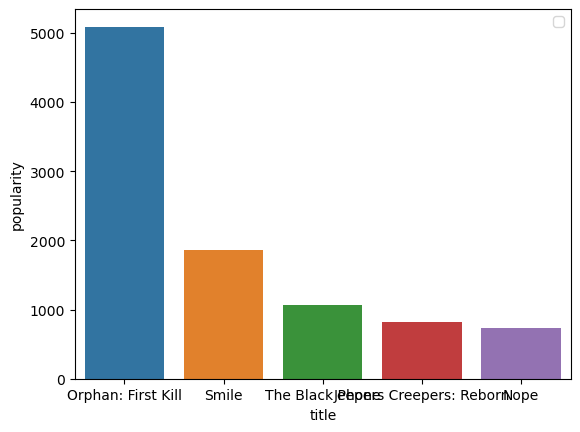

In [48]:
# mengurutkan data film horor berdasarkan popularitas
df3 = df2.nlargest(n=5, columns=['popularity'])
df3 
# visualisasi data berdasarkan data yang sudah di-sort
sns.barplot(data=df3, x='title', y='popularity', orient='v')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Insight: dari visualisasi data di atas diketahui top 5 film horor berdasarkan popularitas. Untuk film horor yang memiliki popularitas tertinggi adalah film Orphan: First Kill

3. Mencari tahu film horor mana saja yang berada di TOP 5 teratas berdasarkan revenue?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


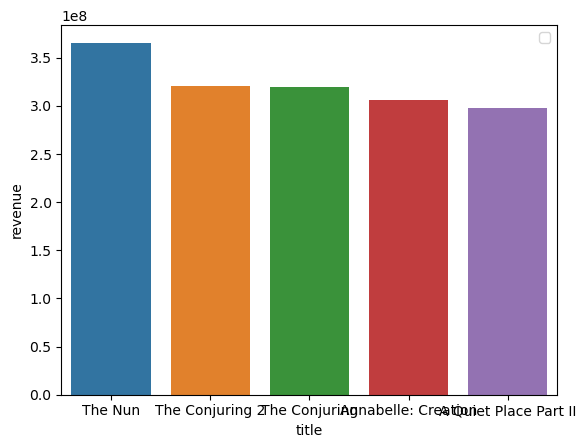

In [47]:
# mengurutkan data film horor berdasarkan popularitas
df4 = df2.nlargest(n=5, columns=['revenue'])
df4 
# visualisasi data berdasarkan data yang sudah di-sort
sns.barplot(data=df4, x='title', y='revenue', orient='v')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Insight: dari visualisasi data di atas adalah didapatkannya top 5 film horor berdasarkan revenue. Dengan film The Nun menempati posisi pertama yang menghasilkan revenue terbanyak.

4. Mencari tahu apakah revenue perfilm-an horor yang berbahasa Indonesia meningkat tiap tahunnya dari tahun 2010 sampai tahun 2022?

In [60]:
# filter data film horor yang berbahasa indonesia saja
df5 = df2[
    (df2['original_language'] == 'id')
]
df5

,id,original_title,title,original_language,overview,tagline,release_date,poster_path,popularity,vote_count,vote_average,budget,revenue,runtime,status,backdrop_path,genre_names,year,profit
3136,976455,Pamali,Pamali,id,"Due to the economic crisis he experienced, Jak...","Violating Customs, Inviting Disaster",2022-10-06,/lQV6CY7PJ2rCslIIWHEBOypY8tk.jpg,14.779,0,0.0,0,0,99,Released,/hHUOu4GHVKLrcvnnJfyDvEUihxE.jpg,Horror,2022,0
4536,572468,Perempuan Tanah Jahanam,Impetigore,id,A woman inherits a house in her ancestral vill...,Family can get under your skin.,2019-10-17,/dku2KnAPALsi69MnvTV7cXrylWm.jpg,10.691,139,6.8,0,0,106,Released,/4JOCooFc5M8w4EoSn3o8hZcKdyO.jpg,Horror,2019,0
6129,638985,KKN di Desa Penari,"KKN, Curse Of The Dancing Village",id,Six students were terrorized by a mysterious d...,A Terrifying True Story Revealed by @SimpleMan,2022-04-30,/63InZxeGgfNQCoWkImR14fB99AY.jpg,8.411,12,5.8,1100000,0,130,Released,/aZ8365UJquswZof2R6LQAoAU04k.jpg,Horror,2022,-1100000
6585,573106,Mata Batin 2,The 3rd Eye 2,id,"After her sister died, Alia decides to start a...",Fear The Dead,2019-01-11,/mdvdjOf3cNEX1dZAbYGQTjTth2X.jpg,7.897,29,5.7,0,0,115,Released,/uTbPhjKXiWjRAqmQ5SnX7TKZk7K.jpg,Horror,2019,0
7167,480007,Mata Batin,The 3rd Eye,id,When her little sister claims she sees the dea...,Believing Is Seeing,2017-11-30,/9vDSQoEVFCwt9O21E0O0BEqu57k.jpg,7.310,66,5.5,0,0,107,Released,/zVITKJxmvzvi5sBECmfDK1i3wA7.jpg,Horror,2017,0
12080,632885,Sebelum Iblis Menjemput: Ayat 2,May the Devil Take You Too,id,"Two years after escaping from demonic terror, ...",The Past Will Find You Again,2020-02-27,/hqLQJ3ee8yKRoQbMPQT11JhlYCe.jpg,4.066,35,7.6,0,0,109,Released,/dZukqjOBMAgyi2PJAPTUIrLITKU.jpg,Horror,2020,0
12484,460578,The Doll 2,The Doll 2,id,A couple who devastated after losing their onl...,What Do You Fear?,2017-07-20,/y10Ll8lFOIZNIVxvraVirT1GMT5.jpg,3.901,34,5.6,0,0,116,Released,/1iDMAeXullaTeiLVZLG1XJ8HlTM.jpg,Horror,2017,0
15389,674503,Walking Dead - Tomate,Walking Dead - Tomate,id,Tells about Yuna's journey to Toraja with her ...,A True Story from Tana Toraja That Become Worl...,2022-04-14,/tj8NNsLxDCHIs6yNlBzwfnSaFzK.jpg,3.010,1,2.0,0,0,79,Released,/2LRnfQBD0oQL4gIN4CnEa8MryXE.jpg,Horror,2022,0
19171,949909,Kuntilanak 3,Kuntilanak 3,id,Dinda who wants to be able to control her powe...,Akan ada yang kembali!,2022-04-30,/s0MJ12Lf412G3KD3VkNGplHtK48.jpg,2.265,2,6.8,0,0,105,Released,/hMr0e9YLgUbwEYIi1LMT6WNiEF3.jpg,Horror,2022,0
26376,450647,Danur,Danur,id,Risa is shocked that her three best friends ar...,I Can See Ghosts,2017-03-27,/rqTxkcoq31q3mRJMV1iXexTanIE.jpg,1.404,13,5.7,0,0,74,Released,/ny34w32qXuaqaLCZ1fau0JFnNrN.jpg,Horror,2017,0


<Axes: xlabel='year', ylabel='revenue'>

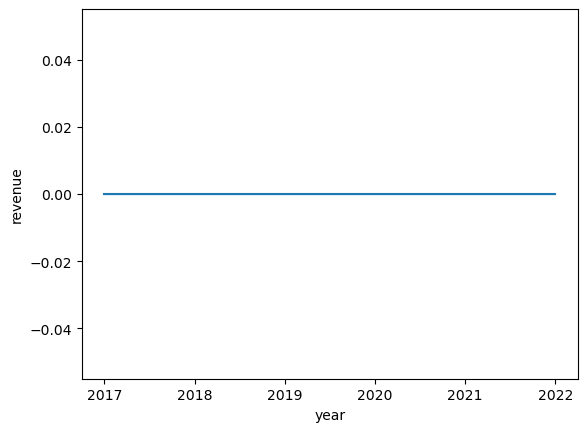

In [63]:
# visualisasi data yang sudah difilter berdasarkan revenue
sns.lineplot(data=df5, x='year',y='revenue')

Insight: dari visualisasi di atas trend revenue film horor berbahasa Indonesia tidak berhasil didapatkan dikarenakan datanya yang tidak lengkap (memiliki missing value pada kolom revenue)

5. Mencari tahu apakah revenue perfilm-an horor dari keseluruhan data meningkat tiap tahunnya dari tahun 2010 sampai tahun 2022?

<Axes: xlabel='year', ylabel='revenue'>

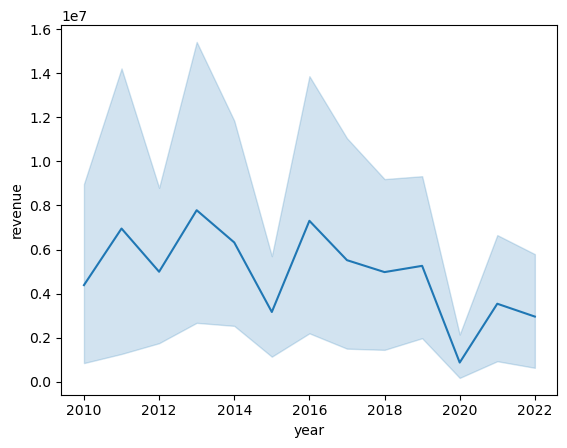

In [65]:
# visualisasi data revenue dari keseluruhan data film horor
sns.lineplot(data=df2, x='year',y='revenue')

Insight: dari line chart di atas diketahui bahwa revenue per tahunnya naik turun. Revenue terendah berada di tahun 2020 sedangkan puncak revenue berada di antara tahun 2012-2014

6. Mencari tahu berapa besar rata-rata profit dan revenue film horor yang berbahasa Indonesia.

In [67]:
# rata-rata profit dan revenue film horor berbahasa Indonesia
print('rata-rata profit film horor Indonesia:', df5['profit'].mean())
print('rata-rata revenue film horor Indonesia:', df5['revenue'].mean())

rata-rata profit film horor Indonesia: -44000.0
rata-rata revenue film horor Indonesia: 0.0


Insight: karena data film horor Indonesia tidak lengkap maka didapatkan hasil seperti di atas.

7. Mencari tahu berapa besar rata-rata profit dan revenue film horor berbahasa inggris.

In [71]:
# filter dulu datanya
df6 = df2[
    (df2['original_language'] == 'en')
]
# rata-rata profit dan revenue film horor berbahasa Inggris
print('rata-rata profit film horor keseluruhan:', df6['profit'].mean())
print('rata-rata revenue film horor keseluruhan:', df6['revenue'].mean())

rata-rata profit film horor keseluruhan: 4148405.1497867806
rata-rata revenue film horor keseluruhan: 5322690.747867804


Insight: didapatkan hasil rata-rata profit sebesar $4,148,405.15 dan rata-rata revenue sebesar $5,322,690.75

8. Bagaimana potensi profit maksimum dan minimum dari film horor?

In [82]:
# mencari upper dan lower value profit menggunakan Z-Score (anggap data terdistribusi normal)
avg = df2['profit'].mean()
std = df2['profit'].std()

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary Profit: {up_bound:.2f}' )
print(f'Lower Boundary Profit: {low_bound:.2f}')

Upper Boundary Profit: 84823107.53
Lower Boundary Profit: -75698357.91


Insight: dari data di-atas didapatkan bahwa potensi maksimum profit adalah di angka 75,373,565.57 
namun untuk minimum profitnya di angka -68,269,887.75 (rugi)

9. Bagaimana hubungan antara popularitas dan revenue dari data film horor tersebut?

hipotesis yang akan diuji:

    - H0 : popularitas film horor berpengaruh pada banyaknya revenue dari film horor
    - H1 : popularitas film horor tidak berpengaruh pada banyaknya revenue dari film horor

In [79]:
# uji hipotesis menggunakan two-sample independent test
t_stat, p_val = stats.ttest_ind(df2['revenue'],df2['popularity'])
print('T-Statistic:',t_stat)
print('P-value:',p_val)

T-Statistic: 8.076482231404821
P-value: 8.492388897570764e-16


Insight: diketahui nilai P-Value dibawah 0.05 maka H0 di-reject. Artinya popularitas film horor tidak berpengaruh pada banyaknya revenue film horor.

In [81]:
# uji korelasi antara popularitas dan revenue menggunakan metode Pearson, Spearman, dan Kendall
corr_r, pval_p = stats.pearsonr(df2['revenue'], df2['popularity'])
corr_rho, pval_s = stats.spearmanr(df2['revenue'], df2['popularity'])
corr_tau, pval_k = stats.kendalltau(df2['revenue'], df2['popularity'])

print(f"r-correlation: {corr_r:.2f}, p-value: {pval_p}")
print(f"rho-correlation: {corr_rho:.2f}, p-value: {pval_s}")
print(f"tau-correlation: {corr_tau:.2f}, p-value: {pval_k}")

r-correlation: 0.14, p-value: 1.090062652451768e-11
rho-correlation: 0.40, p-value: 4.744661766821577e-89
tau-correlation: 0.33, p-value: 1.817266047035372e-84


Insight: dari ketiga metode tersebut diketahui p-value yang berada di-bawah 0.05, maka korelasi antara revenue dan popularity ity tidak real. Namun korelasinya bisa dianggap ada secara kebetulan (by chance)

# Kesimpulan

Dari identifikasi masalah diketahui bahwa program ini ditujukan untuk mencari tahu potensi revenue film horor berdasarkan trend film horor dalam kurun waktu 2010-2022.

Berikut kesimpulan yang sudah didapatkan dari analisa:
- potensi maksimum profit adalah di angka 75,373,565.57 namun untuk minimum profitnya di angka -68,269,887.75
- dari pengujian korelasi antara popularitas dan revenue didapatkan bahwa tidak ada korelasi signifikan antara popularitas film dan revenue, namun hubungannya dianggap ada secara kebetulan. Sebagai contoh bisa dilihat juga dari hasil visualisasi top 5 berdasarkan revenue dan popularitas bahwa film Orphan: The Kill memiliki popularitas paling tinggi tetapi pemegang revenue tertinggi dipegang oleh film The Nun.